In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../input/internet-articles-data-with-users-engagement/articles_data.csv",index_col=0)

In [3]:
df.head()

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


Check types,describe and missing value

In [4]:
df.isnull().sum().to_frame()

,0
source_id,0
source_name,0
author,1020
title,2
description,24
url,1
url_to_image,656
published_at,1
content,1292
top_article,2


We only need a few columns

In [5]:
df = df[['source_name','author','engagement_reaction_count','engagement_comment_count','engagement_share_count','engagement_comment_plugin_count']].dropna(axis=0,how='any')

the reaction engagement score grouped by source name

In [6]:
engagement_reaction_count = df.groupby('source_name')['engagement_reaction_count'].sum()
engagement_reaction_count.to_frame()


,engagement_reaction_count
source_name,
ABC News,342936.0
Al Jazeera English,139383.0
BBC News,516902.0
Business Insider,216545.0
CBS News,459741.0
CNN,1188131.0
ESPN,0.0
Newsweek,93167.0
Reuters,16963.0


the engagement comment score grouped by source name

In [7]:
engagement_comment_count = df.groupby('source_name')['engagement_comment_count'].sum()
engagement_comment_count.to_frame()

,engagement_comment_count
source_name,
ABC News,102573.0
Al Jazeera English,45835.0
BBC News,196855.0
Business Insider,101292.0
CBS News,170960.0
CNN,334455.0
ESPN,0.0
Newsweek,32426.0
Reuters,7101.0


the engagement share score grouped by source name

In [8]:
engagement_share_count = df.groupby('source_name')['engagement_share_count'].sum()
engagement_share_count.to_frame()

,engagement_share_count
source_name,
ABC News,82335.0
Al Jazeera English,35345.0
BBC News,193389.0
Business Insider,311678.0
CBS News,108152.0
CNN,305454.0
ESPN,0.0
Newsweek,29067.0
Reuters,647095.0


the engagement comment plugin score grouped by source name

In [9]:
engagement_comment_plugin_count = df.groupby('source_name')['engagement_comment_plugin_count'].sum()
engagement_comment_plugin_count.to_frame()

,engagement_comment_plugin_count
source_name,
ABC News,1.0
Al Jazeera English,9.0
BBC News,0.0
Business Insider,80.0
CBS News,0.0
CNN,30.0
ESPN,0.0
Newsweek,0.0
Reuters,0.0


The reason why we calculated the engagement is to show how interaction in that news,more interaction it have a better result for a news reach new reader.Interaction in online media such as comment,like,share,reaction,upvote,or downvote

In [10]:
final_engagement_score = engagement_reaction_count + engagement_comment_count + engagement_share_count + engagement_comment_plugin_count 
final_engagement_score = final_engagement_score // 10000
final_engagement_score.to_frame()

,0
source_name,
ABC News,52.0
Al Jazeera English,22.0
BBC News,90.0
Business Insider,62.0
CBS News,73.0
CNN,182.0
ESPN,0.0
Newsweek,15.0
Reuters,67.0


This is for tell us how much are the author in the dataset,it also tell us how much an news produced by each author

In [11]:
highest_source = df['source_name'].value_counts()
highest_source.to_frame()

,source_name
Reuters,1252
ABC News,1137
Business Insider,1048
The Irish Times,993
CNN,961
CBS News,941
The New York Times,869
BBC News,746
Newsweek,539
Al Jazeera English,471


**Data Visualization**

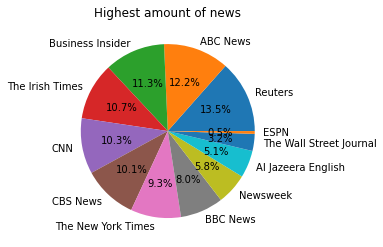

In [12]:
label = list(highest_source.index.values)
plt.pie(highest_source,labels=label,autopct='%1.1f%%')
plt.title('Highest amount of news')
plt.show()

In communication science there is a called opinion leader.Opinion leader is a someone,public figure,organization,goverments or mass media who have a large amount of influence to other people in a certain issue.In this case we can see how much impact a mass media created by looking at their all engagement score

In [13]:
final_engagement_score = final_engagement_score.sort_values(ascending=False)
final_engagement_score.to_frame()


,0
source_name,
CNN,182.0
The New York Times,103.0
BBC News,90.0
CBS News,73.0
Reuters,67.0
Business Insider,62.0
ABC News,52.0
Al Jazeera English,22.0
The Wall Street Journal,15.0


We want to find an opinion leader in here so we only take the top 5 of the author

In [14]:
five_highest_engagement_score = final_engagement_score[:5]
five_highest_engagement_score.to_frame()

,0
source_name,
CNN,182.0
The New York Times,103.0
BBC News,90.0
CBS News,73.0
Reuters,67.0


Making an index for plot

In [15]:
label = list(five_highest_engagement_score.index.values)
label


['CNN', 'The New York Times', 'BBC News', 'CBS News', 'Reuters']

Text(0.5, 1.0, 'Opinion Leader by Total Engagement ')

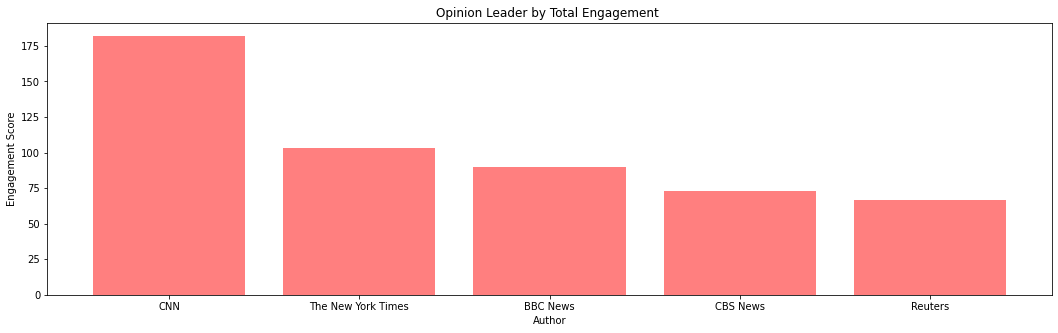

In [16]:
f, ax = plt.subplots(figsize=(18,5))
ax.bar(label,five_highest_engagement_score,color='red', alpha=0.5)
ax.set(xlabel='Author',
      ylabel='Engagement Score')
plt.title('Opinion Leader by Total Engagement ')

Another question is,'are opinion leader having a high engagement just by the amount of articel they produced?".We can check by scatter

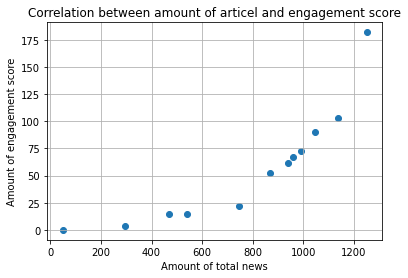

In [17]:
plt.scatter(highest_source,final_engagement_score)
plt.xlabel('Amount of total news')
plt.ylabel('Amount of engagement score')
plt.title('Correlation between amount of articel and engagement score')
plt.grid()
plt.show()

In the plot we can see more articel written it will have more engagement which will have more traffic and more people will see the ads in the author page.So a lot of online mass media more care about the amount of total news rather than the quality